# Buscador

## Motivação

Um buscador é uma ferramenta que, a partir de uma consulta (query), retorna um conjunto de informações relevantes extraídas de uma base de dados. Diversos tipos de aplicações utilizam buscadores: navegadores, aplicativos de mensagens, plataformas de música, sites de compras, bibliotecas digitais, entre outros. Cada um desses buscadores é projetado para otimizar a experiência do usuário, permitindo o acesso rápido e eficiente às informações desejadas.

A importância econômica dos buscadores é inegável. Quando um website aparece entre os primeiros resultados de um buscador web, a qualidade do tráfego recebido aumenta significativamente, o que, por sua vez, aumenta o retorno sobre investimento (ROI) dos negócios. \cite{ParikhDeshmukhSEO}

Dada a onipresença dos buscadores em diversas aplicações, entender seu funcionamento é crucial. Eles não só facilitam o acesso à informação, mas também têm um impacto direto na visibilidade e lucratividade das empresas. A presença constante dos buscadores no mundo digital é tão significativa que eles possuem um ícone universalmente reconhecido: a famosa lupa, que simboliza a busca e descoberta de informações.

## Fundamentação teórica

Os buscadores são ferramentas que, a partir de uma consulta (query), retornam informações relevantes de uma base de dados previamente indexada. Atualmente, existem diversos mecanismos de busca, desenvolvidos com diferentes lógicas de implementação. A importância dos documentos retornados pode ser calculada de várias maneiras, e buscadores como o Google permitem o impulsionamento de links patrocinados. Neste laboratório, será demonstrada a criação de um buscador para bases de dados textuais com uma lógica de indexação acadêmica, isto é, sem considerar que recursos financeiros podem influenciar o ranqueamento dos documentos retornados na busca.

As etapas para criar o buscador são mostrandos na Figura abaixo:

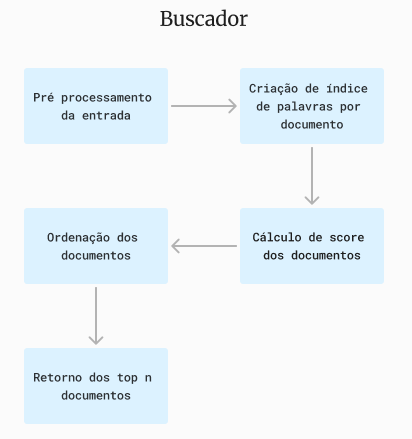

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/search_engine/buscador.png" -O buscador.png
display(Image("buscador.png", width=350))

Figura 1 : Diagrama de funcionamento do Buscador

### Pré processamento da entrada

A primeira etapa do buscador consiste do pré processamento da query de entrada, que corresponde ao conteúdo sobre o qual se deseja obter informações. Dessa forma, o objetivo do buscador é retornar documentos que contenham informações significativas para a query fornecida. O pré-processamento da query é essencial, pois ajuda a reduzir a quantidade de termos a serem pesquisados, ao passo que maximiza o valor informacional dos termos a serem pesquisados. Por isso, essa etapa contribui para a eficiência do processo de busca. Os detalhes sobre a importância do pré processamento foram discutidos em roteiros passados.

### Criação do índice de palavras por documento
Após o pré processamento da query, é gerado um índice de palavras por documento. Esse índice funciona da seguinte forma: para cada palavra *i* presente na base de textos, o índice retorna o conjunto de documentos *d_i* onde a palavra *i* aparece, bem como a quantidade de vezes q_i que essa palavra *i* ocorre em cada documento *d_i*.  Para um melhor entendimento, observe a Figura:

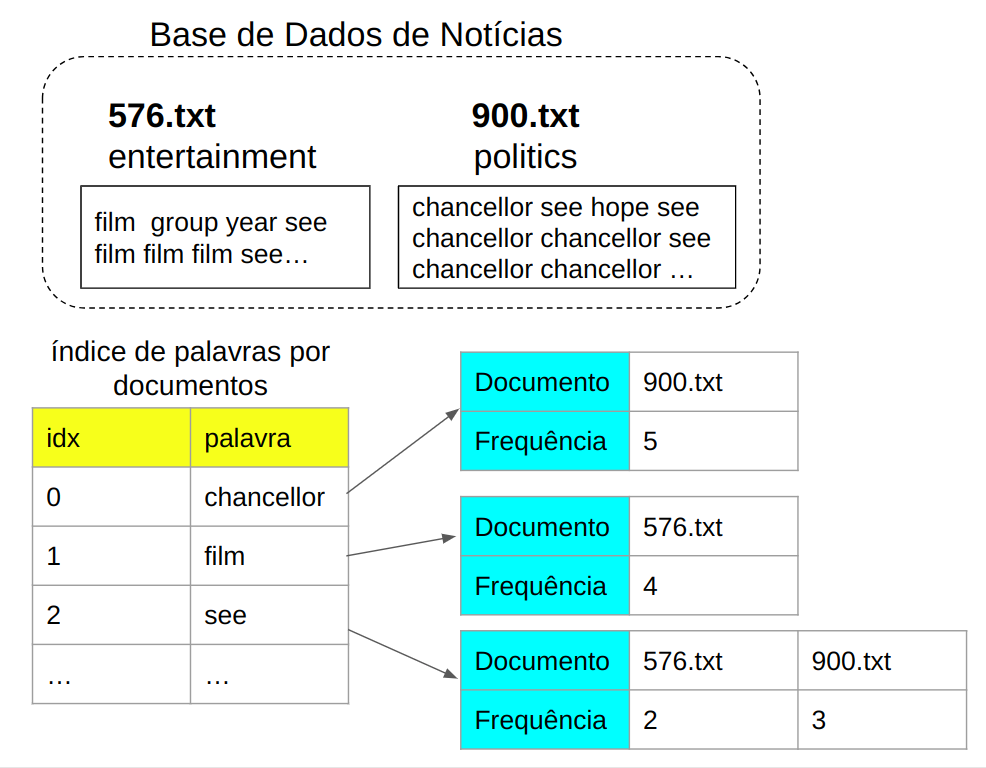

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/search_engine/word_index_by_documents.png" -O word_index_by_documents.png
display(Image("word_index_by_documents.png", width=500))

Figura 2: Índice de palavras por documento

### Cálculo do score dos documentos
Embora a indexação da base de dados permita realizar consultas, o simples retorno de todos os documentos que contenham qualquer termo da query pode produzir um grande número de resultados, tornando a busca pouco precisa. Isso ocorre porque uma consulta geralmente contém múltiplas palavras, e o índice retornará todos os documentos que contenham qualquer uma dessas palavras, mesmo que não sejam relevantes para a consulta como um todo. Por isso, é necessário realizar um cálculo de importância dos documentos retornados. Essa etapa difere de buscador para buscador. Neste laboratório, será realizada por meio da soma de ocrrência de cada documento que foi retornado a partir dos termos da query.
Dessa forma, o intuito é encontrar documentos que sejam significativos para a query de modo geral e não apenas a palavras isoladas da mesma.

Por exemplo, dado a query: "Films to watch with the family" .

Query pré processada : "film watch famili" .

Busca :

'film' : {'doc1': 4, 'doc2': 3, 'doc3': 4 },

'watch': {'doc1': 3, 'doc5': 1  } ,

'famili': { doc2': 1, 'doc3': 2 , doc4 : 1, doc5 : 1  , doc6 : 1 , doc7 : 1}

Nesse exemplo, o cálculo da importância dos documentos seria :

* doc1: 4 (film) + 3 (watch) = 7
* doc2: 3 (film) + 1 (famili) = 4
* doc3: 4 (film) + 2 (famili) = 6
* doc4: 1 (famili) = 1
* doc5: 1 (watch) + 1 (famili) = 2
* doc6: 1 (famili) = 1
* doc7: 1 (famili) = 1


Note que ao realizar esse cálculo é mais evidente a relevância de documentos que atendem a múltiplos termos da query.

### Ordenação dos documentos

O cálculo da importância não necessariamente retorna os documentos ordenadas, por isso é feita uma ordenção por frequência. Assim, tem-se :

{ 'doc1': 7,'doc3': 6, 'doc2': 4, 'doc5': 2, 'doc4': 1, 'doc6': 1, 'doc7': 1 }

### Retorno dos top N documentos

Em seguida, define-se a quantidade N de documentos a serem retornados e a lista é reduzida conforme essa quantidade. O cálculo da importância dos documentos e a redução dos documentos é muito importante, pois o usuário procura informações de forma rápida e eficiente. Embora a análise completa de todos os documentos que contenham os termos da pesquisa possa fornecer uma resposta exaustiva, essa abordagem raramente é prática e muitas vezes desnecessária.



## Resultados esperados

Espera-se que nesse laboratório, o aluno compreenda o funcionamento de um buscador e que consiga implementar um na prática. Para isso, o estudante deverá implementar um buscador em uma base de dados textual.

## Código

Imports de bibliotecas para pré processamento da query de busca.

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Leitura do Dataset

Download do dataset pré processado.

In [ ]:
!wget https://raw.githubusercontent.com/elainedias16/TCC/main/pre_processed_dataset.csv

--2024-10-03 14:56:18--  https://raw.githubusercontent.com/elainedias16/TCC/main/pre_processed_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84507 (83K) [text/plain]
Saving to: ‘pre_processed_dataset.csv.5’

pre_processed_datas 100%[===================>]  82.53K  --.-KB/s    in 0.03s   

2024-10-03 14:56:18 (2.53 MB/s) - ‘pre_processed_dataset.csv.5’ saved [84507/84507]



Leitura do dataset pré processado.

In [ ]:
import pandas as pd

with open('pre_processed_dataset.csv', 'r') as file:
    lines = file.readlines()


def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= ',',
    engine= 'python'
    )
    return df


df = create_dataframe('pre_processed_dataset.csv')

O código abaixo remove a primeira linha do DatFrame, pois consistia do cabeçalho 'genre, filename, title, content'. Após essa remoção, os índices são resetados para começarem a partir do número 0.

In [ ]:
df = df.drop(0, axis = 0)
df = df.reset_index(drop=True)
df

,genre,filename,title,content
0,business,288.txt,UK economy facing 'major risks',uk manufactur sector continu face seriou chall...
1,business,184.txt,US bank 'loses' customer details,bank america reveal lose comput tape contain a...
2,business,471.txt,China suspends 26 power projects,china order halt construct work 26 big power s...
3,business,35.txt,US gives foreign firms extra time,foreign firm give extra year meet tough new co...
4,business,377.txt,Ukraine strikes Turkmen gas deal,ukrain agr pay 30 natur ga suppli turkmenistan...
5,business,150.txt,Bank voted 8-1 for no rate change,deci keep interest rate hold 4 75 earli month ...
6,business,315.txt,Euronext 'poised to make LSE bid',pan european group euronext poi launch bid lon...
7,business,455.txt,Gazprom 'in $36m back-tax claim',nuclear unit russian energi giant gazprom repo...
8,business,206.txt,EMI shares hit by profit warning,share music giant emi sink 16 firm issu profit...
9,business,388.txt,Egypt to sell off state-owned bank,egyptian govern reportedli plan privati one co...


### Pré processamento da query

Métodos de pré processamento explicados em roteiros passados. Neste laboratório serão utilizados para pré processar a query de busca.

In [ ]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)

In [ ]:
# query = 'russian movie'
# query = pre_processing_aux(query)
# print(query)

In [ ]:
query = "Best online games to play with friends"
query = pre_processing_aux(query)
print(query)

good onlin game play friend


### Índice de palavras por documento

O código abaixo cria um índice de palavras por documento utilizando uma tabela hash para otimização. O resultado é um dicionário que associa cada palavra única do DataFrame a uma dicionário de ocorrências.

Inicialmente, o dicionário *h* começa vazio. Se uma palavra de um arquivo ainda não estiver presente no dicionário, ela é adicionada como uma nova chave, e seu valor é um outro dicionário. A contagem de ocorrências dos arquivos é realizada no segundo bloco de *if* do código, onde é verificado se o nome do arquivo (filename) já está registrado no dicionário da palavra. Se não estiver, o nome do arquivo é adicionado com uma contagem inicial de 1; se já estiver, a contagem é incrementada.

In [ ]:
def create_word_index(df):
    h = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        words = content.split()
        for word in words:
            if word not in h:
                h[word] = {}

            if filename not in h[word]:
                h[word][filename] = 1
            else:
                h[word][filename] += 1
    return h

word_index = create_word_index(df)
print(word_index)

{'uk': {'288.txt': 2, '471.txt': 1, '35.txt': 1, '150.txt': 1, '315.txt': 1, '316.txt': 1, '718.txt': 1, '534.txt': 2, '1117.txt': 1, '1110.txt': 7, '1199.txt': 1, '1273.txt': 1, '973.txt': 4, '902.txt': 1, '1910.txt': 1}, 'manufactur': {'288.txt': 5}, 'sector': {'288.txt': 5, '455.txt': 2, '388.txt': 3, '1824.txt': 1}, 'continu': {'288.txt': 1, '455.txt': 1, '206.txt': 2, '316.txt': 1, '1273.txt': 1, '1662.txt': 1, '1747.txt': 1, '1590.txt': 1, '2189.txt': 1, '1910.txt': 1, '2050.txt': 2}, 'face': {'288.txt': 2, '455.txt': 1, '658.txt': 1, '1123.txt': 1, '1310.txt': 1, '1273.txt': 1, '943.txt': 1, '1662.txt': 1, '1335.txt': 2, '2189.txt': 1}, 'seriou': {'288.txt': 2, '184.txt': 1, '1123.txt': 1, '1296.txt': 1, '973.txt': 1, '1530.txt': 2, '1675.txt': 1}, 'challeng': {'288.txt': 1, '1110.txt': 1, '927.txt': 2, '1530.txt': 1, '2189.txt': 5, '1910.txt': 1}, 'next': {'288.txt': 2, '471.txt': 1, '316.txt': 1, '570.txt': 1, '534.txt': 1, '927.txt': 1, '1224.txt': 1, '1215.txt': 1, '1747.txt

### Ocorrências de documentos da query

O método abaixo cria um dicionário para verificar as ocorrências dos filenames das palavras da query. Dessa forma, é criado um dicionário *query_index*  no qual a chave é uma palavra w da query e o valor é outro dicionário que contém a quantidade de ocorrências em cada filename que a palavra w aparece.  


Dessa forma, inicialmente, percorre-se percorre as palavras da query e verifica se estão no índice de palavras por documento (word_index) . Se a palavra estiver, é inserido no campo valor do dicionário da palavra w, as ocorrências dos filenames em que w aparece.

In [ ]:
def get_frequency_query(query, word_index):
    query_index = {}
    for word in query.split():
        if word in word_index:
            query_index[word] = word_index[word]
        else:
            query_index[word] = {}
    return query_index


index_query = get_frequency_query(query, word_index)
print(index_query)

{'good': {'288.txt': 1, '35.txt': 1, '316.txt': 1, '634.txt': 7, '861.txt': 10, '570.txt': 3, '914.txt': 1, '973.txt': 6, '943.txt': 1, '1530.txt': 3, '1662.txt': 1, '1665.txt': 1, '1590.txt': 2, '1490.txt': 1, '2116.txt': 1, '2181.txt': 2, '2050.txt': 3, '1846.txt': 1}, 'onlin': {'1117.txt': 1, '1910.txt': 3, '2050.txt': 1}, 'game': {'943.txt': 2, '1530.txt': 7, '1662.txt': 1, '1747.txt': 2, '1545.txt': 3, '1335.txt': 3, '1665.txt': 1}, 'play': {'388.txt': 1, '316.txt': 1, '861.txt': 1, '559.txt': 1, '540.txt': 1, '570.txt': 2, '1310.txt': 1, '954.txt': 1, '1530.txt': 1, '1747.txt': 3, '1736.txt': 1, '2181.txt': 1}, 'friend': {'867.txt': 1, '1123.txt': 2, '2181.txt': 1}}


O método a seguir soma as ocorrências de cada filename presente no dicionário index_query. Ele cria um dicionário de frequência *f*, inicialmente vazio, onde as contagens de ocorrências serão acumuladas. O código percorre o dicionário que contém as contagens de cada palavra nos arquivos. Se um arquivo (filename) ainda não estiver em f, ele é adicionado com a contagem inicial. Se o arquivo já estiver presente, sua contagem é incrementada com o valor correspondente.

In [ ]:
def sum_occurrences(index_query):
    f = {}
    for word_dict in index_query.values():
        for filename, count in word_dict.items():
            if filename not in f:
                f[filename] = count
            else:
                f[filename] += count

    return f

occurrences = sum_occurrences(index_query)
print(occurrences)

{'288.txt': 1, '35.txt': 1, '316.txt': 2, '634.txt': 7, '861.txt': 11, '570.txt': 5, '914.txt': 1, '973.txt': 6, '943.txt': 3, '1530.txt': 11, '1662.txt': 2, '1665.txt': 2, '1590.txt': 2, '1490.txt': 1, '2116.txt': 1, '2181.txt': 4, '2050.txt': 4, '1846.txt': 1, '1117.txt': 1, '1910.txt': 3, '1747.txt': 5, '1545.txt': 3, '1335.txt': 3, '388.txt': 1, '559.txt': 1, '540.txt': 1, '1310.txt': 1, '954.txt': 1, '1736.txt': 1, '867.txt': 1, '1123.txt': 2}


O método a seguir retorna as top N ocorrências dos documentos com maior importância para as palavras da query. O dicionário do método anterior é ordendado em ordem decrescente. É criado uma lista com as chaves do dicionário e retorna-se apenas N elementos da lista.

In [ ]:
def get_top_n_docs(occurences, top_n):
  sorted_occurences = sorted(occurrences.items(), key=lambda x : x[1], reverse=True) #reverse is descr order
  occurences = dict(sorted_occurences)
  docs = list(occurences.keys())[:top_n]
  return docs

top_n = 5
docs = get_top_n_docs(occurrences, top_n)
print(docs)

['861.txt', '1530.txt', '634.txt', '973.txt', '570.txt']


In [ ]:
top_n = 5
docs = get_top_n_docs(occurrences, top_n)
print(f" Documentos retornados : {docs}")

 Documentos retornados : ['861.txt', '1530.txt', '634.txt', '973.txt', '570.txt']


## Exercícios

Faça download do dataset pré processado *WOS5736*. No *dataset*, existem dois arquivos, um chamado *X.txt* que possui em cada linha o resumo de um artigo científico, e *Y.txt* que contém a classe à qual o artigo pertence. Crie um buscador para os resumos dos artigos. Para isto, realize as seguintes etapas.


* Faça o índice de palavras por documento.
* Faça o pré processamento da *query*.
* Identifique os documentos em que pelo menos uma das palavras da *query* aparecem.
* Faça o cálculo do *score* dos documentos.
* Faça a ordenação dos documentos relevantes para a *query*.
* Retorne os cinco documentos mais relevantes para a *query*.


## Referências

@misc{ParikhDeshmukhSEO,
  author    = {Aashna Parikh and Sanjay Deshmukh},
  title     = {Search Engine Optimization},
  howpublished = {M. Tech. Student, Dept of Computer Engg, NMIMS University, Mumbai, INDIA},
  year      = {2013},
  url = {https://d1wqtxts1xzle7.cloudfront.net/66254313/search_engine_optimization_IJERTV2IS110872-libre.pdf?1618306716=&response-content-disposition=inline%3B+filename%3DIJERT_Search_Engine_Optimization.pdf&Expires=1724440072&Signature=hNatEk-4hLaTpmnPBnak5sXAktKf~cay~lu5A3OMfpyqxTJtwv2TKhBdLh3e--KLDCTdNdC~lWNpvkqn2TjZsZCtR9WoJB3~SZMK~rXChADNOmG0sU--ELj817nSW~~QbBP~65tbTs3Za7XfxCmRtCw4o4u0rURfXPyjcsprLaOZOtIy-8nj~YjPFtAvEaTHY6YNky1FbAFSWM6MJcG~UdKpnANMCS3vm1ILVy7KULXCsvTv4Q5-osBHPkoPOvZfXgSqLn4cfY7O6jmIPF~nL2~dZ73d9JzITSvzd~CkvK5k8xduCNTA~p~fP~97hz81S9RGj8GuT8aNJt9THr4fnQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA},
  note      = {Asst Prof, Dept of Computer Engg, NMIMS University, Mumbai, INDIA}
}